## Keras Tutorial - Predicting Wine Types: Red or White?

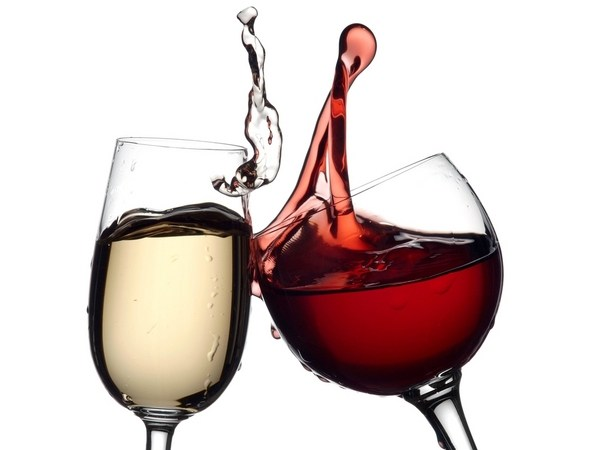

In [11]:
from IPython.display import Image, display
display(Image(filename='wine-red-and-white.jpg', embed=True))

Wine industry shows a recent growth spurt, as social drinking is on the rise. A key factor in wine certification and quality assessment is physicochemical tests which are laboratory-based and takes into account factors like acidity, pH level, presence of sugar and other chemical properties. It would be interesting if we could predict the wine type given some of its properties. This could later be scaled up to predict prices of each individual wine which every wine seller dreams of.

To predict we'll use basic neural network models. The simplest and easiest Python library out there to use is Keras. Its a really simple library to get started with to learn about deep learning.

### Let’s get started now!

Understanding The Data
However, before we start loading in the data, it might be a good idea to check how much we really know about wine (in relation with the dataset, of course).
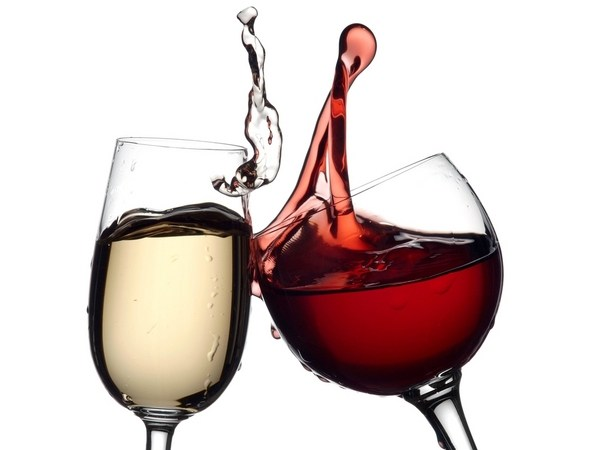
The data consists of two datasets that are related to red and white variants of the Portuguese “Vinho Verde” wine. 

In [82]:
#Loading In The Data from uci repositories

# Import pandas 
import pandas as pd

# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')    


##### Here’s a short description of each variable:

1) Fixed acidity: acids are major wine properties and contribute greatly to the wine’s taste. Usually, the total acidity is divided into two groups: the volatile acids and the nonvolatile or fixed acids. Among the fixed acids that you can find in wines are the following: tartaric, malic, citric, and succinic.

2) Volatile acidity: the volatile acidity is basically the process of wine turning into vinegar. In the U.S, the legal limits of Volatile Acidity are 1.2 g/L for red table wine and 1.1 g/L for white table wine. 

3) Citric acid is one of the fixed acids that you’ll find in wines. It’s expressed in g/dm3dm3 in the two data sets.

4) Residual sugar typically refers to the sugar remaining after fermentation stops, or is stopped. It’s expressed in g/dm3dm3 in the red and white data.

5) Chlorides can be a major contributor to saltiness in wine. Here, you’ll see that it’s expressed in.

6) Free sulfur dioxide: the part of the sulphur dioxide that is added to a wine and that is lost into it is said to be bound, while the active part is said to be free. Winemaker will always try to get the highest proportion of free sulphur to bind. This variables is expressed in mg/dm3dm3 in the data.

7) Total sulfur dioxide is the sum of the bound and the free sulfur dioxide (SO2). Here, it’s expressed in mg/dm3dm3. There are legal limits for sulfur levels in wines: in the EU, red wines can only have 160mg/L, while white and rose wines can have about 210mg/L. Sweet wines are allowed to have 400mg/L. For the US, the legal limits are set at 350mg/L and for Australia, this is 250mg/L.

8) Density is generally used as a measure of the conversion of sugar to alcohol. Here, it’s expressed in g/cm3cm3.

9) Sulphates are to wine as gluten is to food. You might already know sulphites from the headaches that they can cause. They are a regular part of the winemaking around the world and are considered necessary. In this case, they are expressed in g(potassiumsulphatepotassiumsulphate)/dm3dm3.

10) Alcohol: wine is an alcoholic beverage and as you know, the percentage of alcohol can vary from wine to wine. It shouldn’t surprised that this variable is inclued in the data sets, where it’s expressed in % vol.

11) Quality: wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual number is the median of at least three evaluations made by those same wine experts.

12) pH or the potential of hydrogen is a numeric scale to specify the acidity or basicity the wine. As you might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.

### Exploratory Data Analysis

Lets start of by getting a quick view of each dataset.

In [83]:
# Print info on white wine
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [84]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Our red wine dataframe has relatively lower (1599) observations than that of wine (4898). All the values are float except for the quality variable which is ratings given by wine experts on a scale of 1-10.

In [85]:
# Print info on red wine
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [86]:
#Print a random sample of 5 obs in white wine dataset
white.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
754,5.9,0.35,0.47,2.2,0.110,14.0,138.0,0.99320,3.09,0.50,9.1,5
1115,7.0,0.15,0.38,2.2,0.047,33.0,96.0,0.99280,3.13,0.39,10.4,8
2981,8.5,0.23,0.28,11.1,0.033,30.0,97.0,0.99507,3.03,0.39,10.5,7
1334,9.0,0.24,0.50,1.2,0.048,26.0,107.0,0.99180,3.21,0.34,12.4,6
4630,5.7,0.25,0.32,12.2,0.041,43.0,127.0,0.99524,3.23,0.53,10.4,7


In [87]:
# Double check for null values in `red`
pd.isnull(red).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### Visualizing The Data
One way to do this is by looking at the distribution of some of the dataset’s variables and make scatter plots to see possible correlations

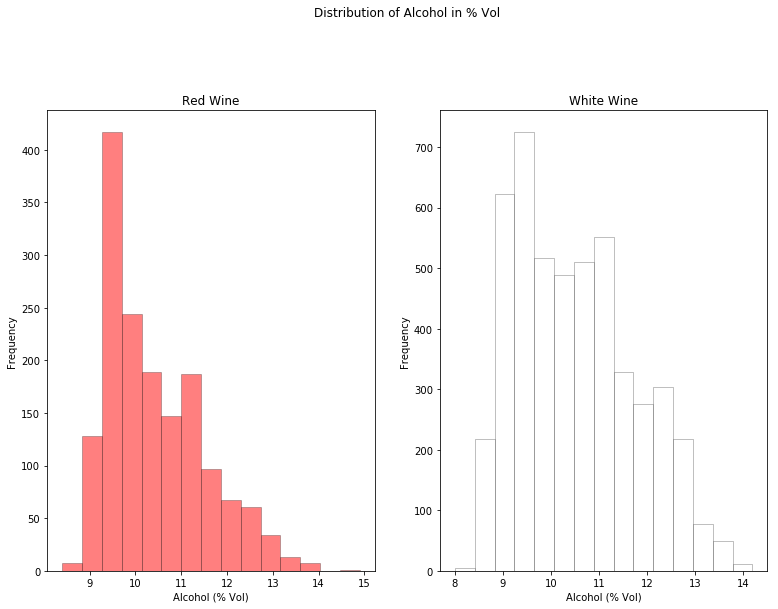

In [88]:
import matplotlib.pyplot as plt

#Split with same y-axis
fig, ax = plt.subplots(1, 2,figsize=(10, 8))

ax[0].hist(red.alcohol, 15, facecolor='red',  ec="black", lw=0.5, alpha=0.5)
ax[1].hist(white.alcohol, 15, facecolor='white', ec="black", lw=0.5, alpha=0.5)

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.8, hspace=0.05, wspace=0.2)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
#ax[0].set_ylim([0, 800])
ax[0].set_xlabel("Alcohol (% Vol)")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol (% Vol)")
ax[1].set_ylabel("Frequency")
#ax[1].set_ylim([0, 800])

fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

One would notice that most of the wines made have a 9~10% alcohol present in them. Ofcourse some would notice that 10-12% is also frequent though not as much as 9%. Moreover the y-axis scales are different because of the disproportionate dataset (unbalanced) observations between red and white.

### Sulphates

Next, one thing that interests me is the relation between the sulphates and the quality of the wine. As you may know, sulphates can cause people to have headaches and I’m wondering if this infuences the quality of the wine. What’s more, I often hear that women especially don’t want to drink wine exactly because it causes headaches. Maybe this affects the ratings for the red wine?



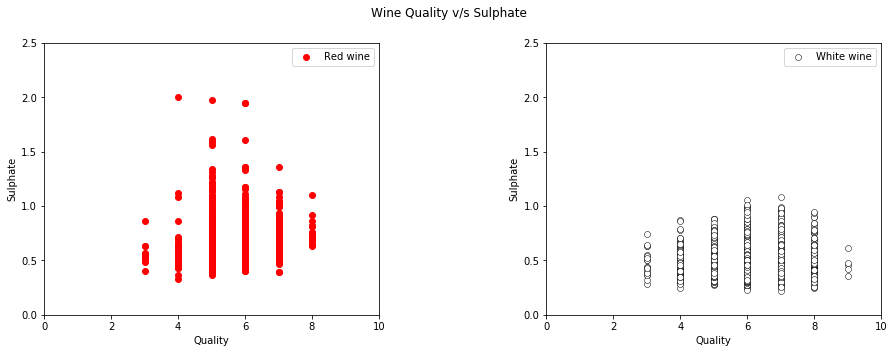

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(red['quality'], red["sulphates"], color="red", label="Red wine")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5, label="White wine")

ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphate")
ax[1].set_ylabel("Sulphate")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
ax[0].legend(loc='best')
ax[1].legend(loc='best')
fig.suptitle("Wine Quality v/s Sulphate")

plt.show()

So, from the graphs above we can see that for the same values (most of it) the ratings stay constant which doesn't necessarily affect the quality as i guessed earlier. Although, we can see that the red wine has higher amount of sulphates in them which explains why drinking red wine causes headache and women prefer white over red.

### Acidity

Apart from the sulphates, acidity is one of the important wine characteristics that is necessary to achieve quality wines. Great wines often balance out acidity, tannin, alcohol and sweetness. Some more research taught me that in quantities of 0.2 to 0.4 g/L, volatile acidity doesn’t affect a wine’s quality. At higher levels, however, volatile acidity can give wine a sharp, vinegary tactile sensation. Extreme volatile acidity signifies a seriously flawed wine.

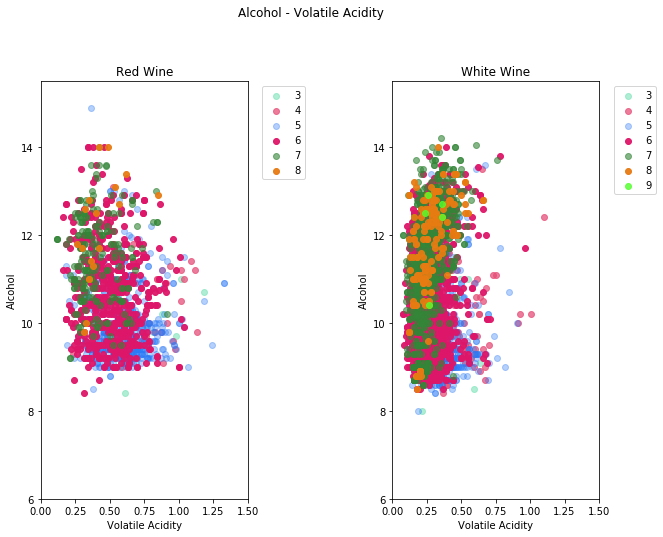

In [90]:
import numpy as np

np.random.seed(570)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

fig, ax = plt.subplots(1, 2, figsize=(10, 8))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i])
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.5])
ax[1].set_xlim([0,1.5])
ax[0].set_ylim([6,15.5])
ax[1].set_ylim([6,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=.85, wspace=0.7)

plt.show()

### Correlation Matrix

Since it can be somewhat difficult to interpret graphs, it’s also a good idea to plot a correlation matrix. This will give insights more quickly about which variables correlate:

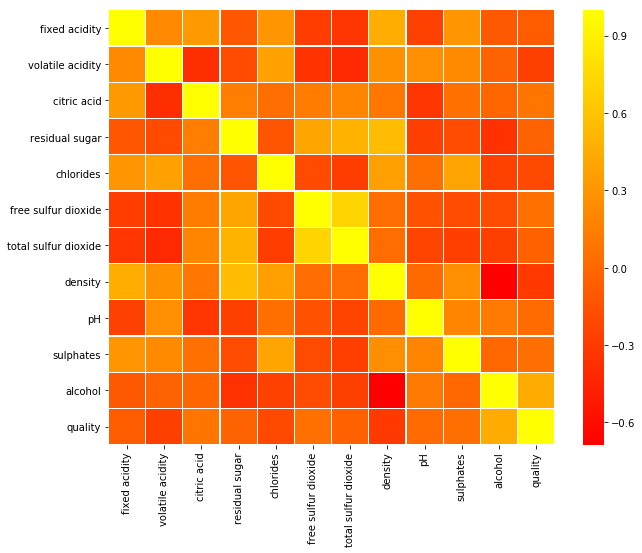

In [91]:
import seaborn as sns
corr = red.append(white, ignore_index=True).corr()
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap="autumn",linewidths=.2)
plt.show()

As you would expect, there are some variables that correlate, such as density and residual sugar. Also volatile acidity and type are more closely connected than you originally could have guessed by looking at the two data sets separately, and it was kind of to be expected that free sulfur dioxide and total sulfur dioxide were going to correlate.

### Data Preprocessing

Create a column to distinguish between red and white by giving red value 1 and white value 0. Why not simply label them 'red' and 'white'? This is because neural networks only works with numerical data and not labels, so it outputs probabilities which we have to later compute to one of the labels. (it's not that difficult!)

In [92]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Row bind white to red
wines = red.append(white, ignore_index=True)

wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


### Train and Test Sets

In this case, there seems to be an imbalance, but we will go with this for the moment. Afterwards, we can evaluate the model and if it underperforms, we can resort to undersampling or oversampling to cover up the difference in observations.

In [93]:
wines.shape

(6497, 13)

In [94]:
from sklearn.model_selection import train_test_split

# Specify the data 
X=wines.ix[:,0:11]

# Specify the target labels and flatten the array 
y= wines['type']

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


### Standardize The Data

Standardization is a way to deal with these values that lie really far apart. The main reason we standardize values is that NN's behave well with smaller numbers. When given a choice its always preferrable to chose smaller numbers which makes it easier to train and reduce to chances of falling for the local optima.

In [95]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

Now that we have our data preprocessed, we can move on to the real work: building our own neural network to classify wines.

### Model Data

A quick way to get started is to use the Keras Sequential model: it’s a linear stack of layers. You can easily create the model by passing a list of layer instances to the constructor, which you set up by running: model = Sequential()

In [96]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [97]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 12)                144       
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


[array([[ 0.2896654 ,  0.01695609, -0.1637314 , -0.4055706 , -0.1897687 ,
          0.05104744, -0.47552979,  0.04375035,  0.14994401,  0.18585712,
          0.04605234,  0.4203161 ],
        [ 0.09246093, -0.00486219,  0.15394145, -0.3556453 ,  0.37075537,
         -0.09201503,  0.22433394,  0.49172276,  0.02939814, -0.00528288,
         -0.28554958, -0.29101855],
        [ 0.13772285,  0.10540932, -0.16185051, -0.13713309, -0.30931568,
          0.29137081,  0.22610158, -0.03789827,  0.03900152, -0.13670495,
          0.02206749,  0.07224816],
        [ 0.12972063, -0.46136355, -0.1358273 , -0.03706533,  0.21573442,
          0.21198452, -0.02762926, -0.19320443,  0.24703926, -0.42241281,
          0.29690397, -0.07473344],
        [-0.06937274,  0.13956004, -0.04767117,  0.03820831,  0.27192348,
         -0.47782913, -0.09866273, -0.42932004, -0.04532751, -0.17295876,
         -0.34326571,  0.48160571],
        [ 0.06270897,  0.10312521,  0.34606183, -0.12457022, -0.16116223,
      

In [98]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=10, batch_size=1, verbose=1)

Epoch 1/10
4352/4352 [==============================] - 6s - loss: 0.0899 - acc: 0.9690     
Epoch 2/10
4352/4352 [==============================] - 5s - loss: 0.0221 - acc: 0.9959     
Epoch 3/10
4352/4352 [==============================] - 5s - loss: 0.0195 - acc: 0.9966     
Epoch 4/10
4352/4352 [==============================] - 6s - loss: 0.0166 - acc: 0.9970     
Epoch 5/10
4352/4352 [==============================] - 9s - loss: 0.0151 - acc: 0.9975     
Epoch 6/10
4352/4352 [==============================] - 7s - loss: 0.0140 - acc: 0.9972     
Epoch 7/10
4352/4352 [==============================] - 6s - loss: 0.0133 - acc: 0.9972     
Epoch 8/10
4352/4352 [==============================] - 6s - loss: 0.0149 - acc: 0.9972     
Epoch 9/10
4352/4352 [==============================] - 7s - loss: 0.0120 - acc: 0.9975     
Epoch 10/10
4352/4352 [==============================] - 7s - loss: 0.0110 - acc: 0.9977     


### Predict Values

Let’s put your model to use! You can make predictions for the labels of the test set with it. Just use predict() and pass the test set to it to predict the labels for the data. In this case, the result is stored in y_pred:


In [99]:
y_pred = model.predict(X_test)

# round predictions
y_pred = [round(x[0]) for x in y_pred]

In [100]:
y_pred[:5]

[0.0, 1.0, 0.0, 0.0, 0.0]

In [101]:
y_test[:5]

3103    0
1419    1
4761    0
4690    0
4032    0
Name: type, dtype: int64

In [102]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1696/2145 [======================>.......] - ETA: 0s
loss: 2.32%

acc: 99.44%


In [103]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[1585,    3],
       [   9,  548]], dtype=int64)

In [104]:
# Precision 
precision_score(y_test, y_pred)

0.99455535390199634

In [105]:
# Recall
recall_score(y_test, y_pred)

0.98384201077199285

In [106]:
# F1 score
f1_score(y_test,y_pred)

0.98916967509025266

In [107]:
# Cohen's kappa
cohen_kappa_score(y_test, y_pred)

0.98539861110953542